## Runs DE on different clusters. Also runs DE within each cluster for each condition

In [1]:
import os
from os.path import join, basename
import glob
import pandas as pd
import seaborn as sns

In [2]:
## PBMC
# indir = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/DE_TF"
# outdir = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/DE_TF/overlapDE"
# sample_names = "preB,postB"
# cores = 8
# n_donors = 4
# genome = "/data/Mito_Trace/data/external/GRCh38_MT_blacklist/fasta/genome.fa"


## TCELL
indir = "/data/Mito_Trace/output/pipeline/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/DE_TF"
outdir = "/data/Mito_Trace/output/pipeline/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/DE_TF/overlapDE"
sample_names = "pre,post"
cores = 8
n_donors = 2
genome = "/data/Mito_Trace/data/external/GRCh38_MT_blacklist/fasta/genome.fa"

pvalBH_thresh = 0.01



In [3]:
sample_names = sample_names.split(",")
sample_names

['pre', 'post']

In [4]:
cond_indir = join(indir, "conditions_clusters")


In [5]:
tfs_nclust_set_de_overlap = {} # for each tf count number of clusters seen with de results in at least 1 donor
tfs_clust_de = {}
num_sig = {} #number of significant values for each cluster

clust_dirs = glob.glob(cond_indir+"/clust_*")
clusters = [basename(x).split("_")[-1] for x in clust_dirs]
clusters.sort()

for i in clust_dirs:
    print("clusert", i)
    clust = basename(i).split("_")[-1]
    print('clust', clust)

    curr_dir = join(i, "allDonors")
    curr_f = glob.glob(join(curr_dir, "*DE.TF.csv"))
    assert(len(curr_f)<=1)
    if len(curr_f) == 0:
        print("no file")
        continue
    curr_f = curr_f[0]
    curr_de = pd.read_csv(curr_f,index_col=0)
    print('curr_de', curr_de.shape)
    curr_de = curr_de.loc[curr_de["p_val_adj_BH"] < pvalBH_thresh]
    num_sig[clust] = len(curr_de)
    for tf in curr_de.index:
        if tf in tfs_nclust_set_de_overlap.keys():
            tfs_nclust_set_de_overlap[tf].add(clust)
                #tfs_nclust_de_overlap[tf] += 1
            tfs_clust_de[tf].append(clust)
        else:
            #tfs_nclust_de_overlap[tf] = 1
            tfs_nclust_set_de_overlap[tf] = set([clust])
            tfs_clust_de[tf] = [clust]
    print('curr_de sig', curr_de.shape)



clusert /data/Mito_Trace/output/pipeline/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/DE_TF/conditions_clusters/clust_5
clust 5
curr_de (633, 6)
curr_de sig (157, 6)
clusert /data/Mito_Trace/output/pipeline/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/DE_TF/conditions_clusters/clust_2
clust 2
curr_de (633, 6)
curr_de sig (291, 6)
clusert /data/Mito_Trace/output/pipeline/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/DE_TF/conditions_clusters/clust_1
clust 1
curr_de (633, 6)
curr_de sig (435, 6)
clusert /data/Mito_Trace/

In [6]:
for tf, clusts in tfs_clust_de.items():
    assert(len(clusts)==len(set(clusts)))

In [7]:
tfs_nclust_de_overlap = {k:len(v) for k, v in tfs_nclust_set_de_overlap.items()}
tfs_nclust_de_overlap = pd.Series(tfs_nclust_de_overlap).sort_values()[::-1]

In [8]:
tfs_nclust_de_overlap

JUNB(var.2)     10
ATF7             9
ETV4             8
ETV1             8
BATF             8
                ..
NR1H4::RXRA      1
FIGLA            1
NR3C2            1
MNT              1
BACH2(var.2)     1
Length: 588, dtype: int64

## For each cluster-tf, sum the number of donors with DE

In [9]:
tfs_clust_de

{'YY2': ['5', '4', '7', '3', '8'],
 'FOSL2::JUNB': ['5', '2', '1', '11', '3', '0'],
 'FOSB::JUNB': ['5', '1', '3', '0'],
 'FOSL2::JUND': ['5', '1', '11', '3', '0'],
 'BACH1': ['5', '1', '11', '3'],
 'FOS::JUN': ['5', '1', '11', '3', '0'],
 'FOS::JUND': ['5', '1', '3', '0'],
 'FOSL2::JUN': ['5', '1', '3', '0'],
 'ELK3': ['5', '2', '4', '7', '3', '8', '0'],
 'FOSL1::JUNB': ['5', '2', '1', '11', '3', '0'],
 'FOSL1::JUND': ['5', '2', '1', '11', '7', '3', '0'],
 'FOS::JUNB': ['5', '2', '1', '11', '3', '0'],
 'FOSL1::JUN': ['5', '1', '3', '0'],
 'JUND': ['5', '2', '1', '11', '7', '3', '0'],
 'JUN(var.2)': ['5', '1', '3', '0'],
 'FOXK2': ['5', '2', '1', '4', '7', '3', '0'],
 'ETV4': ['5', '2', '1', '4', '7', '3', '8', '0'],
 'TFAP4': ['5', '1', '11', '4', '3', '0'],
 'FOS': ['5', '2', '1', '11', '3', '0'],
 'YY1': ['5', '4', '7', '3'],
 'FOSL2': ['5', '1', '11', '3', '0'],
 'NFE2L1': ['5', '2', '1', '11', '3', '0'],
 'FOXD1': ['5', '4', '7', '3', '0'],
 'FOXO3': ['5', '4', '7', '3', '0'],
 'B

In [10]:
cluster_tf = pd.DataFrame(index=tfs_clust_de.keys(), columns = clusters)
cluster_tf.loc[:,:] = 0


for tf in tfs_clust_de:
    for cl in tfs_clust_de[tf]:
        print('cl', cl)
        cluster_tf.loc[tf, cl] += 1


cluster_tf

cl 5
cl 4
cl 7
cl 3
cl 8
cl 5
cl 2
cl 1
cl 11
cl 3
cl 0
cl 5
cl 1
cl 3
cl 0
cl 5
cl 1
cl 11
cl 3
cl 0
cl 5
cl 1
cl 11
cl 3
cl 5
cl 1
cl 11
cl 3
cl 0
cl 5
cl 1
cl 3
cl 0
cl 5
cl 1
cl 3
cl 0
cl 5
cl 2
cl 4
cl 7
cl 3
cl 8
cl 0
cl 5
cl 2
cl 1
cl 11
cl 3
cl 0
cl 5
cl 2
cl 1
cl 11
cl 7
cl 3
cl 0
cl 5
cl 2
cl 1
cl 11
cl 3
cl 0
cl 5
cl 1
cl 3
cl 0
cl 5
cl 2
cl 1
cl 11
cl 7
cl 3
cl 0
cl 5
cl 1
cl 3
cl 0
cl 5
cl 2
cl 1
cl 4
cl 7
cl 3
cl 0
cl 5
cl 2
cl 1
cl 4
cl 7
cl 3
cl 8
cl 0
cl 5
cl 1
cl 11
cl 4
cl 3
cl 0
cl 5
cl 2
cl 1
cl 11
cl 3
cl 0
cl 5
cl 4
cl 7
cl 3
cl 5
cl 1
cl 11
cl 3
cl 0
cl 5
cl 2
cl 1
cl 11
cl 3
cl 0
cl 5
cl 4
cl 7
cl 3
cl 0
cl 5
cl 4
cl 7
cl 3
cl 0
cl 5
cl 2
cl 1
cl 11
cl 4
cl 7
cl 3
cl 0
cl 5
cl 4
cl 7
cl 3
cl 5
cl 2
cl 1
cl 11
cl 4
cl 7
cl 3
cl 0
cl 5
cl 1
cl 11
cl 7
cl 3
cl 5
cl 2
cl 4
cl 3
cl 6
cl 0
cl 5
cl 2
cl 1
cl 11
cl 4
cl 7
cl 3
cl 0
cl 5
cl 2
cl 4
cl 7
cl 3
cl 8
cl 0
cl 5
cl 2
cl 7
cl 3
cl 0
cl 5
cl 2
cl 1
cl 3
cl 0
cl 5
cl 2
cl 1
cl 11
cl 4
cl 7
cl 6
cl 9
cl 0
cl 5
cl 

cl 4
cl 3
cl 1
cl 3
cl 1
cl 4
cl 1
cl 1
cl 11
cl 3
cl 1
cl 4
cl 1
cl 0
cl 1
cl 1
cl 3
cl 1
cl 3
cl 1
cl 3
cl 1
cl 4
cl 3
cl 1
cl 4
cl 3
cl 1
cl 1
cl 4
cl 3
cl 0
cl 1
cl 4
cl 1
cl 1
cl 4
cl 7
cl 3
cl 8
cl 1
cl 11
cl 4
cl 7
cl 8
cl 1
cl 11
cl 3
cl 1
cl 1
cl 3
cl 0
cl 1
cl 3
cl 1
cl 7
cl 3
cl 0
cl 1
cl 1
cl 3
cl 0
cl 1
cl 11
cl 4
cl 7
cl 1
cl 4
cl 3
cl 1
cl 11
cl 0
cl 1
cl 3
cl 1
cl 4
cl 7
cl 3
cl 0
cl 1
cl 1
cl 1
cl 1
cl 3
cl 1
cl 3
cl 1
cl 1
cl 1
cl 1
cl 1
cl 1
cl 1
cl 3
cl 1
cl 1
cl 1
cl 3
cl 8
cl 0
cl 1
cl 3
cl 1
cl 1
cl 3
cl 1
cl 11
cl 3
cl 1
cl 4
cl 3
cl 1
cl 0
cl 1
cl 0
cl 1
cl 0
cl 1
cl 4
cl 3
cl 1
cl 1
cl 4
cl 7
cl 3
cl 1
cl 1
cl 3
cl 1
cl 7
cl 1
cl 3
cl 1
cl 3
cl 1
cl 3
cl 1
cl 1
cl 4
cl 7
cl 3
cl 1
cl 0
cl 1
cl 1
cl 7
cl 3
cl 1
cl 1
cl 4
cl 3
cl 1
cl 3
cl 1
cl 4
cl 1
cl 1
cl 3
cl 0
cl 1
cl 1
cl 1
cl 1
cl 7
cl 3
cl 1
cl 8
cl 1
cl 4
cl 1
cl 7
cl 1
cl 4
cl 7
cl 3
cl 1
cl 4
cl 7
cl 3
cl 8
cl 1
cl 1
cl 1
cl 1
cl 0
cl 1
cl 4
cl 3
cl 1
cl 4
cl 3
cl 1
cl 1
cl 1
cl 1
cl 4
cl 7
cl 1
cl 4

,0,1,10,11,12,13,2,3,4,5,6,7,8,9
YY2,0,0,0,0,0,0,0,1,1,1,0,1,1,0
FOSL2::JUNB,1,1,0,1,0,0,1,1,0,1,0,0,0,0
FOSB::JUNB,1,1,0,0,0,0,0,1,0,1,0,0,0,0
FOSL2::JUND,1,1,0,1,0,0,0,1,0,1,0,0,0,0
BACH1,0,1,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFP57,1,0,0,0,0,0,0,0,0,0,0,0,0,0
TP53,1,0,0,0,0,0,0,0,0,0,0,0,0,0
PAX1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
BHLHE40,1,0,0,0,0,0,0,0,0,0,0,0,0,0


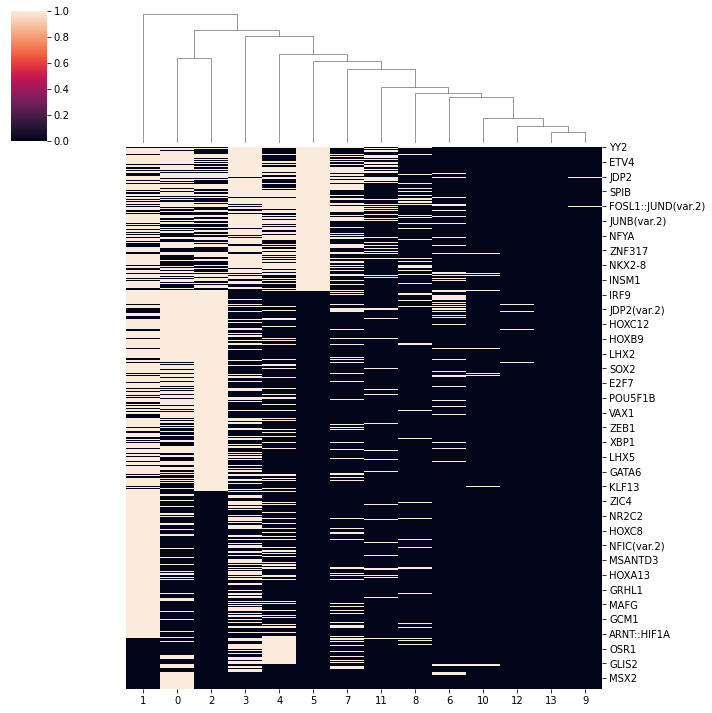

In [11]:
g = sns.clustermap(cluster_tf.astype(int), row_cluster=False)

## Save results
- a. ordered list of TFs
- b. tf-by-cluster matrix, where each entry is how many donors had that TF as a significant pre vs post DE results.
- c. A heat map of that results

In [12]:
# if not os.path.exists(outdir):
#     os.mkdir(outdir)
# cluster_tf.to_csv(join(outdir, "tf_by_cluster_deCounts.csv"))
# tfs_nclust_de_overlap.to_csv(join(outdir, "tf_numClusters.csv"))
# g.savefig(join(outdir, "tf_numClusters.heatmap.png"))


outdir = join(outdir, f"pvalBHthresh_{pvalBH_thresh}", "allDonors")
if not os.path.exists(outdir):
    os.makedirs(outdir)

cluster_tf.to_csv(join(outdir, "tf_by_cluster_deCounts.csv"))
tfs_nclust_de_overlap.to_csv(join(outdir, "tf_numClusters.csv"))
g.savefig(join(outdir, "tf_numClusters.heatmap.png"))

In [13]:
outdir

'/data/Mito_Trace/output/pipeline/TcellDupi_may17_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/DE_TF/overlapDE/pvalBHthresh_0.01/allDonors'

In [35]:
print("TFs and the number of clusters they were found in")
print(f"Number of TFs: {len(tfs_nclust_de_overlap)}")
print(f"Total DE hits across all clusters (TF is counted for each cluster): {sum(tfs_nclust_de_overlap)}")
print('\n')
print("First 5 entries")
tfs_nclust_de_overlap.head()

TFs and the number of clusters they were found in
Number of TFs: 588
Total DE hits across all clusters (TF is counted for each cluster): 1965


First 5 entries


JUNB(var.2)    10
ATF7            9
ETV4            8
ETV1            8
BATF            8
dtype: int64

In [36]:
print("Number of signifcant DEs for each cluster:")
print(num_sig)
print('\n')
print("Validating that this value is equal to the TF-count summation")
print(f"Total number of DE hits: {sum(num_sig.values())}")

Number of signifcant DEs for each cluster:
{'5': 157, '2': 291, '1': 435, '11': 61, '4': 190, '10': 12, '12': 5, '7': 126, '3': 289, '6': 51, '8': 47, '9': 3, '13': 0, '0': 298}


Validating that this value is equal to the TF-count summation
Total number of DE hits: 1965
